In [1]:
from sklearn import tree
from sklearn import preprocessing
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
## Import datasetst and encoding target feature

In [2]:
train = pd.read_csv('otto-group-product-classification-challenge/train.csv').drop(columns=['id'])
test = pd.read_csv('otto-group-product-classification-challenge/test.csv')
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])

train.shape, test.shape

((61878, 94), (144368, 94))

In [ ]:
## Information about features, distribution of values

In [3]:
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135,3.842335
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720,2.510794
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000,8.000000


In [4]:
zeros_train = train.apply(lambda s : s.value_counts().get(0,0), axis =1)
print('frequency of zeros in train: {}'.format(zeros_train.sum()/(train.shape[1]*train.shape[0])))

frequency of zeros in train: 0.7853076369217946


array([[<AxesSubplot:title={'center':'feat_1'}>,
        <AxesSubplot:title={'center':'feat_2'}>,
        <AxesSubplot:title={'center':'feat_3'}>,
        <AxesSubplot:title={'center':'feat_4'}>,
        <AxesSubplot:title={'center':'feat_5'}>,
        <AxesSubplot:title={'center':'feat_6'}>,
        <AxesSubplot:title={'center':'feat_7'}>,
        <AxesSubplot:title={'center':'feat_8'}>,
        <AxesSubplot:title={'center':'feat_9'}>,
        <AxesSubplot:title={'center':'feat_10'}>],
       [<AxesSubplot:title={'center':'feat_11'}>,
        <AxesSubplot:title={'center':'feat_12'}>,
        <AxesSubplot:title={'center':'feat_13'}>,
        <AxesSubplot:title={'center':'feat_14'}>,
        <AxesSubplot:title={'center':'feat_15'}>,
        <AxesSubplot:title={'center':'feat_16'}>,
        <AxesSubplot:title={'center':'feat_17'}>,
        <AxesSubplot:title={'center':'feat_18'}>,
        <AxesSubplot:title={'center':'feat_19'}>,
        <AxesSubplot:title={'center':'feat_20'}>],
       

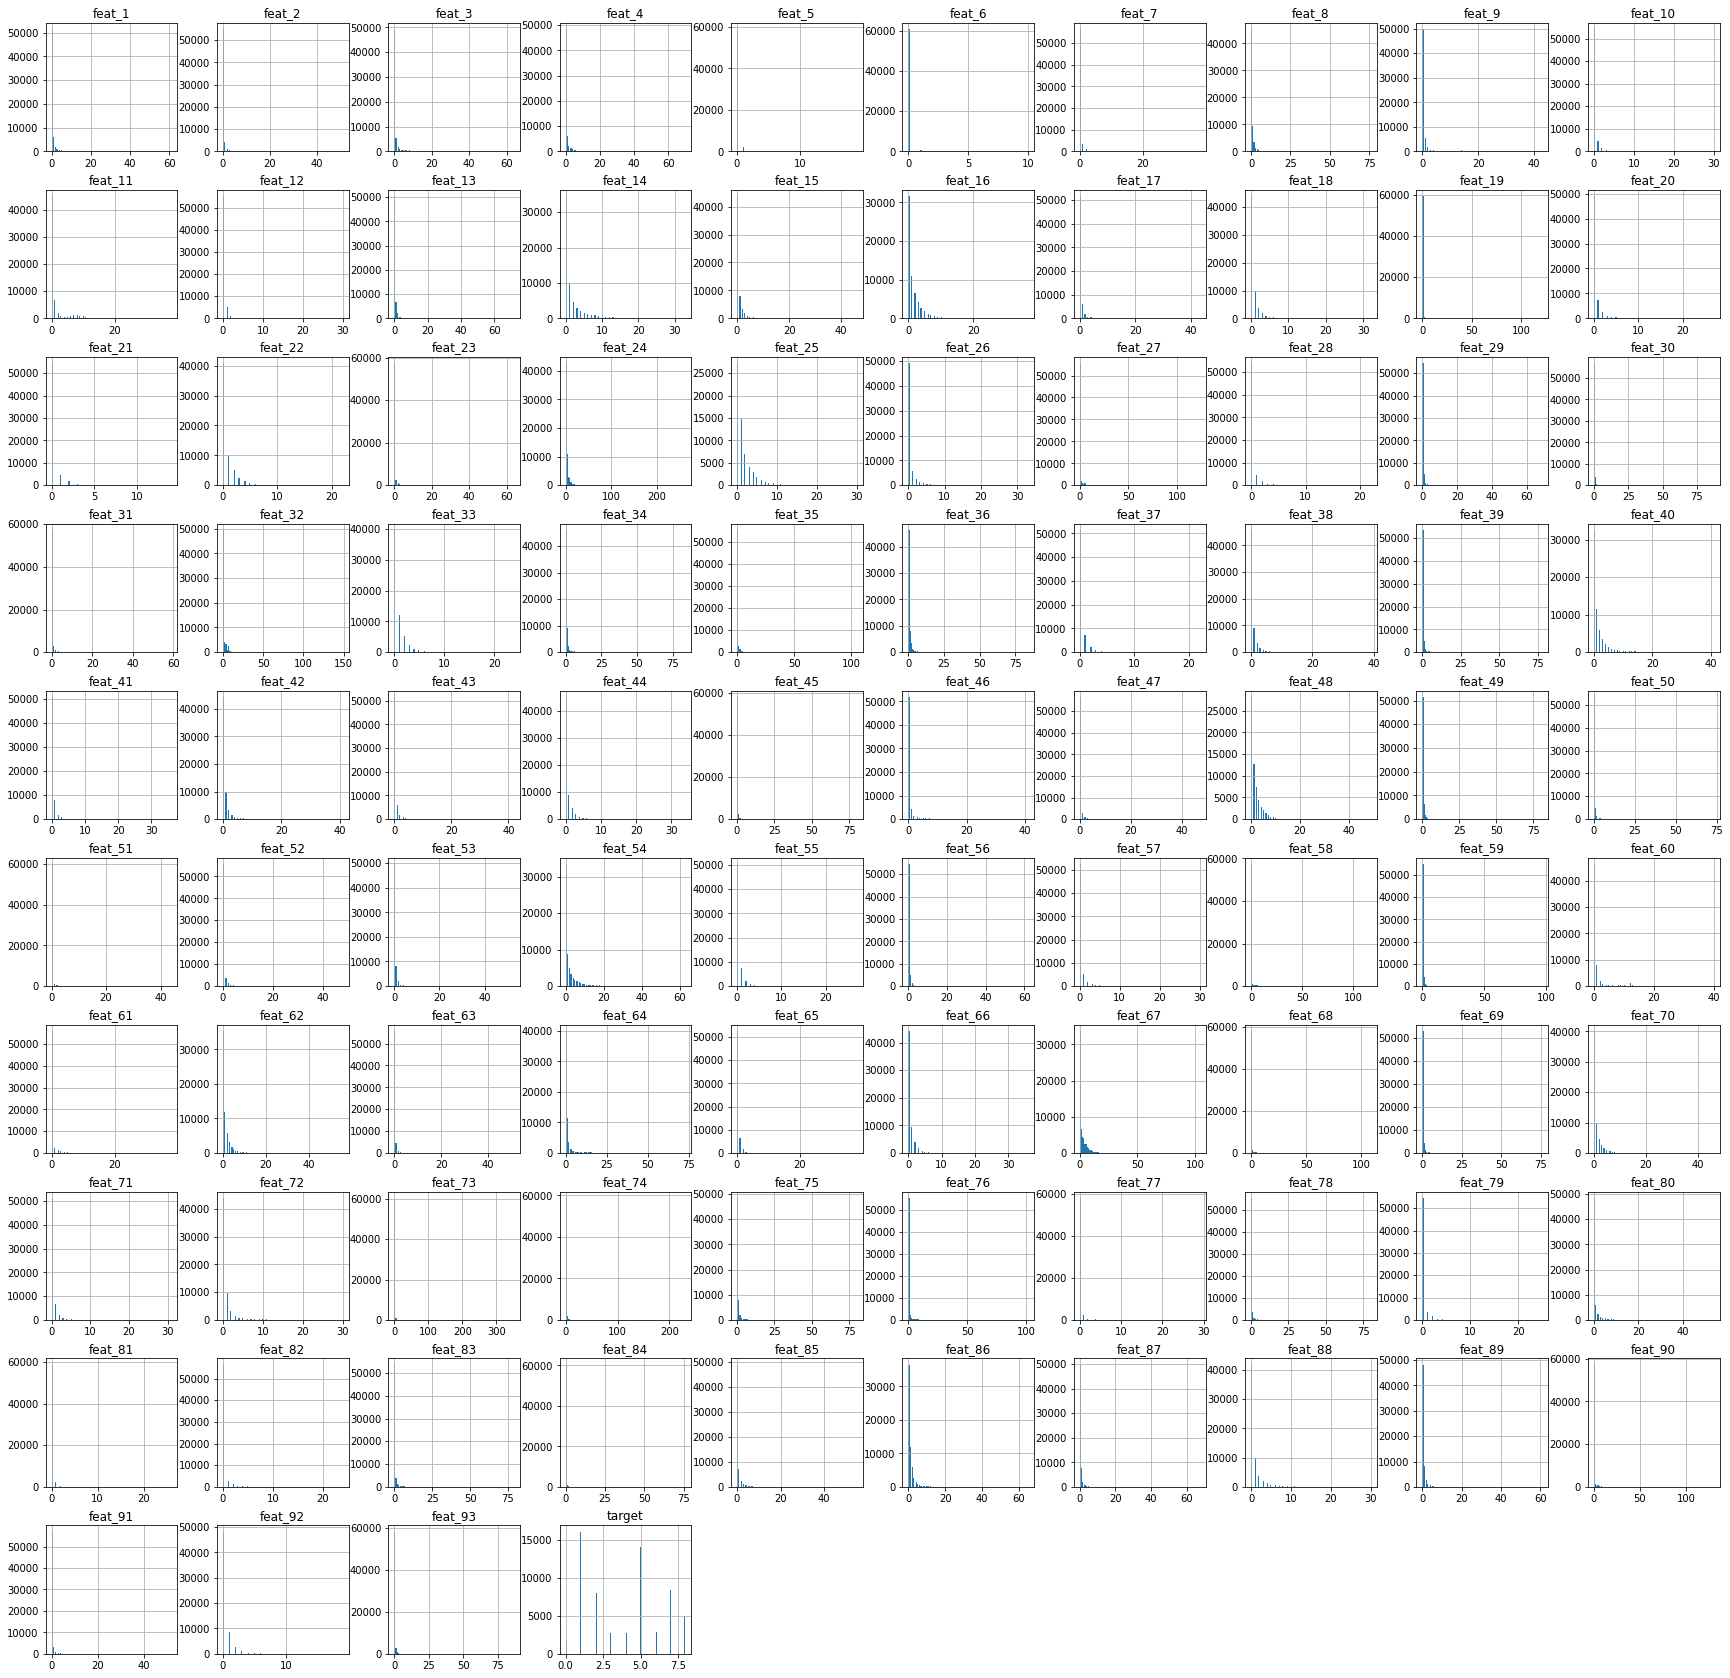

In [5]:
train.hist(bins = 100, figsize=(30,30))
#plt.savefig('./images/train_hists.png', dpi = 300)
#same with test.csv

In [ ]:
## Dividing the dataset into training and test datasets

In [6]:
X_train, X_val, y_train, y_val = \
train_test_split(train[train.columns[:-1]], train[train.columns[-1]], test_size = 0.2, random_state = 23)

In [7]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((49502, 93), (12376, 93), (49502,), (12376,))

In [ ]:
## RandomForestClassifier

In [8]:
clf = RandomForestClassifier(n_estimators = 100)


In [ ]:
## Finding important features and sort them by significance

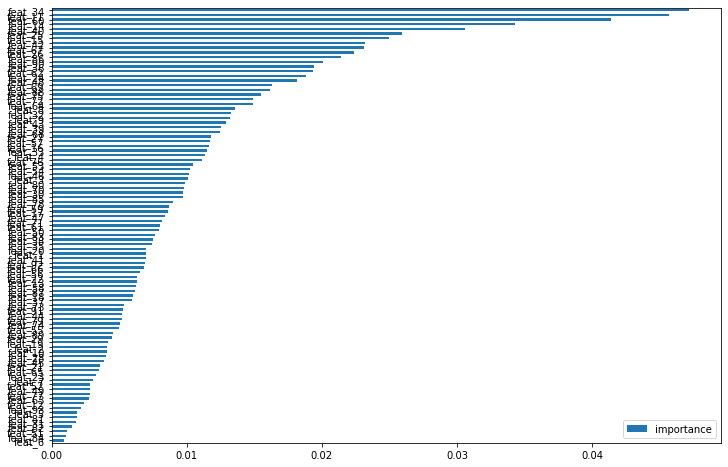

In [9]:
clf.fit(X_train, y_train)
imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
plt.show()


In [ ]:
## Find such a quantity of features at which the log_loss becomes minimal

In [12]:
min_loss = 2
quantity_feat = 0

for i in range(3, 94, 10):
    clf.fit(X_train, y_train)
    important_columns = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']) \
    .sort_values('importance')[-1:-i:-1].reset_index()['index'].to_list()
    important_columns.append('target')
    train_imp_feat = train[important_columns]
    if min_loss > log_loss(y_val, clf.predict_proba(X_val), eps = 1e-15, normalize=True):
        min_loss= log_loss(y_val, clf.predict_proba(X_val), eps = 1e-15, normalize=True)
        quantity_feat = i
    else:
        continue 
min_loss, quantity_feat 

(0.5992224557348563, 83)

In [ ]:
## Create list with 82 important features and target

In [50]:
clf.fit(X_train, y_train)
important_columns = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']) \
        .sort_values('importance')[-1:-83:-1].reset_index()['index'].to_list()
important_columns.append('target')

In [312]:
## Select dataset with important features

In [51]:
train_imp_feat = train[important_columns]
train_imp_feat

,feat_34,feat_60,feat_11,feat_14,feat_40,feat_25,feat_26,feat_15,feat_67,feat_86,...,feat_28,feat_10,feat_45,feat_65,feat_21,feat_23,feat_7,feat_49,feat_52,target
0,0,11,1,0,1,1,1,0,7,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,2,2,0,5,1,...,0,1,0,2,0,0,5,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,1,0,0,2,6,1,0,3,0,...,0,0,0,4,0,0,0,0,0,8
61874,1,0,0,2,0,2,0,0,5,2,...,0,0,0,0,0,0,0,0,0,8
61875,0,0,0,1,0,0,0,0,18,3,...,0,0,0,0,0,0,0,0,0,8
61876,0,0,0,0,0,1,0,0,6,0,...,1,0,0,0,0,0,0,0,0,8


In [ ]:
## Create train and test datasets with selected features

In [15]:
X_train_imp, X_val_imp, y_train_imp, y_val_imp = \
train_test_split(train_imp_feat[train_imp_feat.columns[:-1]], train_imp_feat[train_imp_feat.columns[-1]], test_size = 0.2, random_state = 23)

In [16]:
X_train_imp.shape, X_val_imp.shape, y_train_imp.shape, y_val_imp.shape

((49502, 82), (12376, 82), (49502,), (12376,))

In [ ]:
## Finding n_estimators with GridSearchCV

In [17]:
params ={'n_estimators': range(80,200,10)}

In [18]:
search= GridSearchCV(clf, param_grid= params, n_jobs=-1)

In [19]:
search.fit(X_train_imp, y_train_imp )

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(80, 200, 10)})

In [20]:
search.best_params_

{'n_estimators': 180}

loss with GridSearchCV: 0.5820431848150167


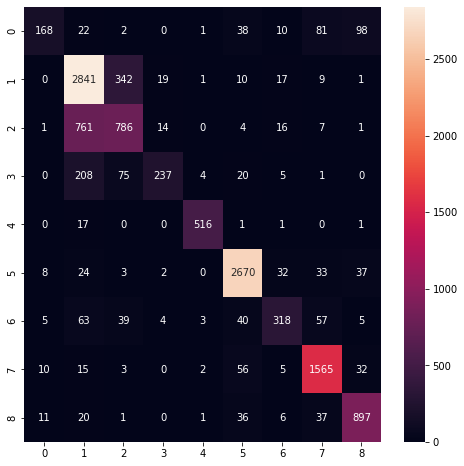

In [21]:
#conf_matrix with GridSearchCV
conf_mat = confusion_matrix(y_val_imp, search.predict(X_val_imp))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')
print('loss with GridSearchCV: {0}'.format(log_loss(y_val_imp, search.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

In [ ]:
## training RandomForestClassifier with best n_estimators 

In [25]:
clf = RandomForestClassifier(n_estimators = 180)
clf.fit(X_train_imp, y_train_imp)

RandomForestClassifier(n_estimators=180)

loss without GridSearchCV: 0.5860375891219107


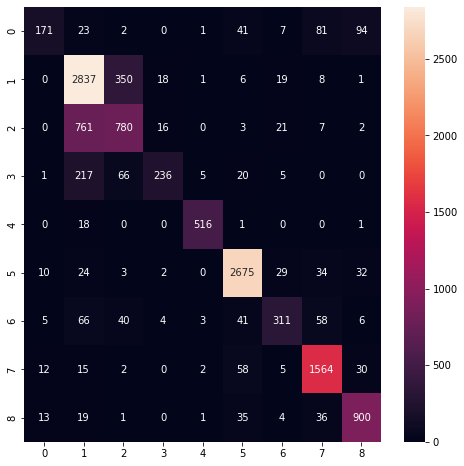

In [26]:
#conf_matrix without GridSearchCV
conf_mat = confusion_matrix(y_val_imp, clf.predict(X_val_imp))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')
print('loss without GridSearchCV: {0}'.format(log_loss(y_val_imp, clf.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

In [ ]:
## Perform calibration to improve the log_loss result

In [68]:
print('loss without calibration: {0}'.format(log_loss(y_val_imp, search.predict_proba(X_val_imp), eps = 1e-15, normalize=True)))

calibrated_clf = CalibratedClassifierCV(RandomForestClassifier (n_estimators = 180), method='isotonic', cv=5)
calibrated_clf.fit(X_train, y_train)

print('loss with calibration: {0}'.format(log_loss(y_val, calibrated_clf.predict_proba(X_val), eps = 1e-15, normalize=True)))

##By sampling, RandomForestClassifier(n_estimators = 180) showed the best result on a dataset with 93 features

loss without calibration: 0.5820431848150167
loss with calibration: 0.4897231580701757


<AxesSubplot:>

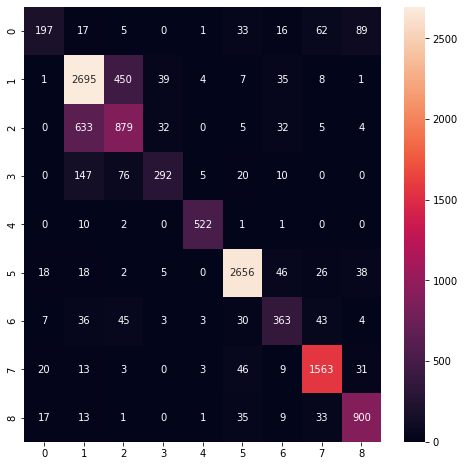

In [62]:
## Confusion matrix with calibration
### The result has become better, but I do not know how to improve further
conf_mat = confusion_matrix(y_val, calibrated_clf.predict(X_val))
plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d')

In [ ]:
## Predicting on the test dataset and write the results as indicated in the exampleSubmission

In [63]:
pred = calibrated_clf.predict_proba(test.drop(columns=['id']))
pred

array([[2.35255959e-03, 1.34562844e-01, 1.58711138e-01, ...,
        1.42395792e-02, 1.15224929e-03, 6.13114879e-04],
       [6.62360500e-03, 2.71321150e-03, 3.50286303e-03, ...,
        5.89835835e-03, 2.32381583e-01, 1.79374095e-03],
       [2.93987239e-04, 0.00000000e+00, 5.34037513e-05, ...,
        3.60184658e-04, 1.51579174e-03, 1.02718555e-04],
       ...,
       [9.79597265e-04, 3.13068970e-01, 4.89091031e-01, ...,
        1.51807560e-02, 1.18557573e-03, 3.97315162e-04],
       [2.53281117e-04, 5.63822528e-01, 4.53124143e-02, ...,
        5.44856996e-04, 6.70719965e-04, 1.61427952e-04],
       [8.28161999e-04, 4.55252398e-01, 4.77131010e-01, ...,
        1.68017083e-02, 8.95220468e-04, 1.03151048e-04]])

In [64]:
output = pd.DataFrame(pred, columns=["Class_1","Class_2","Class_3","Class_4","Class_5","Class_6","Class_7","Class_8","Class_9"])
output.index.name = "id"
output.index += 1
output

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,0.002353,0.134563,0.158711,0.684915,0.000120,0.003333,0.014240,0.001152,0.000613
2,0.006624,0.002713,0.003503,0.003217,0.000204,0.743665,0.005898,0.232382,0.001794
3,0.000294,0.000000,0.000053,0.000374,0.000021,0.997279,0.000360,0.001516,0.000103
4,0.002824,0.603790,0.343871,0.024326,0.000025,0.000250,0.001941,0.001669,0.021303
5,0.049709,0.000091,0.000129,0.000242,0.000019,0.008023,0.006045,0.205947,0.729796
...,...,...,...,...,...,...,...,...,...
144364,0.496249,0.046043,0.011094,0.025206,0.000026,0.170338,0.140913,0.006748,0.103382
144365,0.000661,0.296887,0.601380,0.089875,0.000020,0.000851,0.009464,0.000763,0.000099
144366,0.000980,0.313069,0.489091,0.177545,0.000093,0.002458,0.015181,0.001186,0.000397


In [65]:
output.to_csv("./otto_submission_2.csv")